# Exercise 01: Hyperparameter Tuning Part 1: Warm-up

In this exercise,
you will explore how hyperparameter settings
affect how ML models are fit to data samples.

(Plots, etc., are heavily based on [this tutorial](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).)

Let's install the necessary packages:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.2.0-cp310-cp310-many

and import the necessary modules:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

We will be attempting
to use ML
to learn an underlying model
from noisy samples.

The underlying model is defined by `true_func()` and will be plotted below:

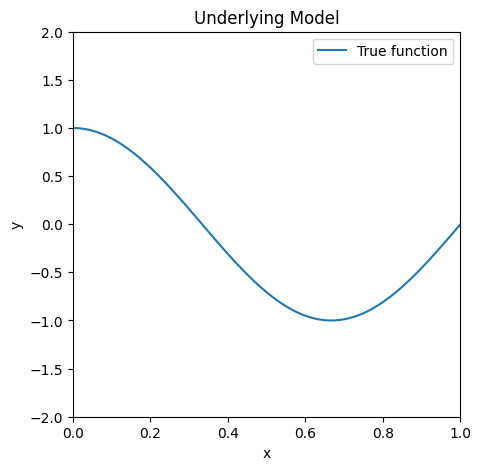

In [3]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

plt.figure(figsize=(5, 5))
xs = np.linspace(0, 1, 100)
plt.plot(xs, true_fun(xs), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Underlying Model")
plt.show()

Let's compute some noisy samples and overlay them on the plot:

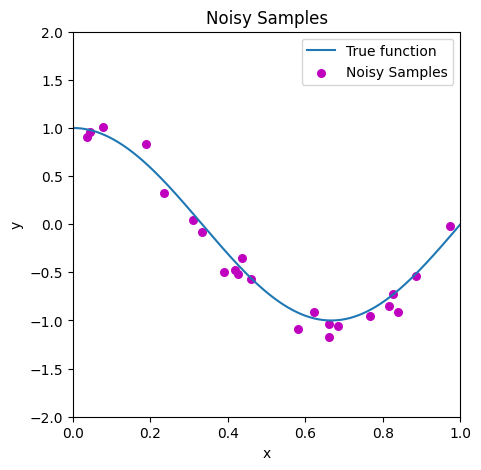

In [16]:
np.random.seed(3)

N_samples = 30

X_samples = np.sort(np.random.rand(N_samples))
y_samples = true_fun(X_samples) + np.random.randn(N_samples) * 0.1

plt.figure(figsize=(5, 5))
xs = np.linspace(0, 1, 1000)
plt.plot(xs, true_fun(xs), label="True function")
plt.scatter(X_samples[:,np.newaxis], y_samples, color='m', s=30, label="Noisy Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Noisy Samples")
plt.show()


Make sure you understand what you are looking at above!

**If I want to make the purple dots more noisy, what change(s) should I make to the code above?**

We could increase the 0.1 parameter in Y_samples which would cause the samples to deviate further away from the true function along the y-axis. 

We are going to use ML
to estimate the blue curve
from the purple dots.

The function we're trying to model isn't particularly sophisticated,
so a polynomial should do the trick.

The code below
creates degree-2 polynomial features
from our input points
and then attempts to fit a degree-2 polynomial
to those features
using linear regression.

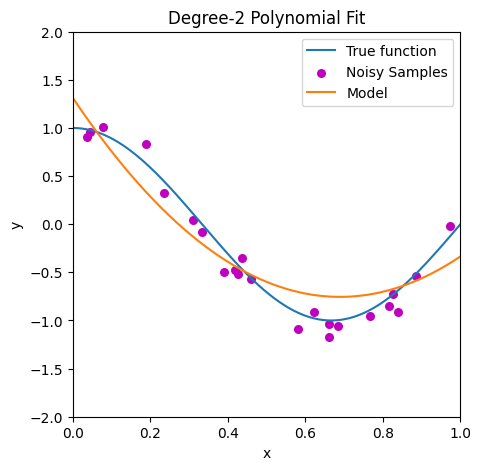

In [17]:
## A pipeline is a canned set of operations to apply to the input data.
## Once it manipulates the data, it acts like any other estimator.
pipeline = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("linreg", LinearRegression()),
])
pipeline.fit(X_samples[:, np.newaxis], y_samples)

plt.figure(figsize=(5, 5))
xs = np.linspace(0, 1, 1000)
plt.plot(xs, true_fun(xs), label="True function")
plt.scatter(X_samples[:,np.newaxis], y_samples, color="m", s=30, label="Noisy Samples")
plt.plot(xs, pipeline.predict(xs[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree-2 Polynomial Fit")
plt.show()

**Does this degree-2 polynomial model do a good of capturing the underlying function?  Justify your answer.**

If all we care about is capturing the underlying function within this window, I would say this model doesn't do a great job of it, but it does give a sense of the general shape. There are 5 data points around y=-1.0 that don't fit very well, plus a few other stragglers that are a bit too far from the model to say they fit "well", but overall, this model is okay.

Let's experiment with different polynomial degrees.

The following code runs the same pipeline on the same input data,
but adjusts the degree of the polynomial used as the ML model.
It also gauges the model fit
using mean squared error (MSE).

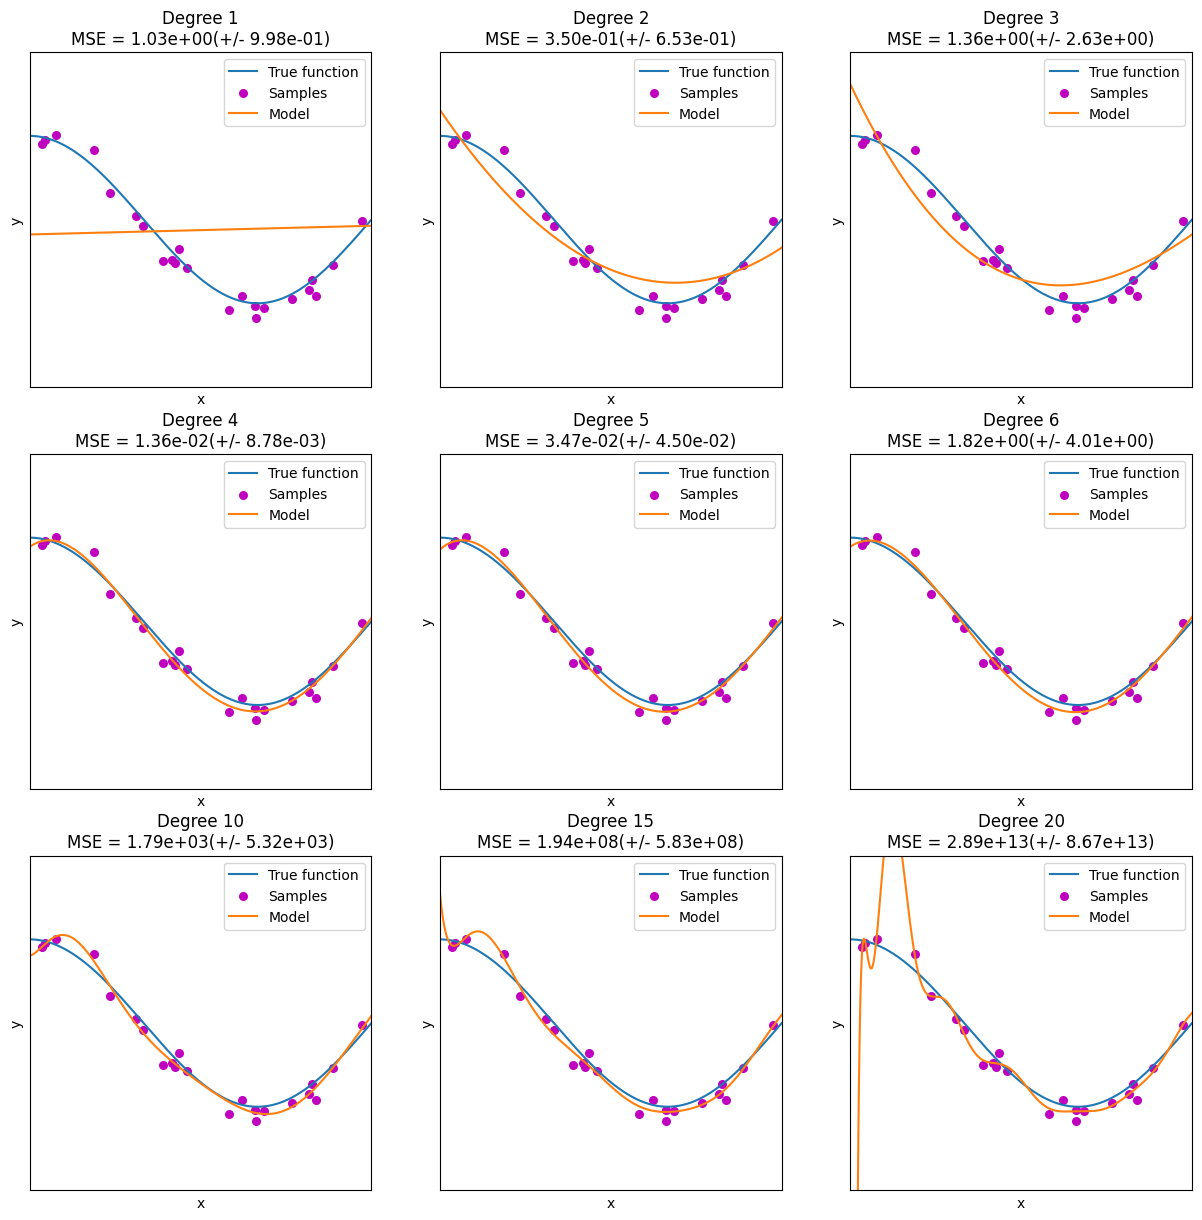

In [18]:
degrees = [1, 2, 3, 4, 5, 6, 10, 15, 20]

N_cols = 3
N_rows = 1+(len(degrees)//N_cols)

plt.figure(figsize=(5*N_cols, 5*N_rows))

for i in range(len(degrees)):
    ax = plt.subplot(N_rows, N_cols, i+1)
    plt.setp(ax, xticks=(), yticks=())

    pipeline = Pipeline([
        ("poly",   PolynomialFeatures(degree=degrees[i], include_bias=False)),
        ("linreg", LinearRegression()),
    ])
    pipeline.fit(X_samples[:, np.newaxis], y_samples)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline,
        X_samples[:, np.newaxis],
        y_samples,
        scoring="neg_mean_squared_error",
        cv=10,
    )

    xs = np.linspace(0, 1, 1000)
    plt.plot(xs, true_fun(xs), label="True function")
    plt.scatter(X_samples, y_samples, color="m", s=30, label="Samples")
    plt.plot(xs, pipeline.predict(xs[:, np.newaxis]), label="Model")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()
    ))

plt.show()

**Which degree polynomial do you think does the best job?  Why?**

YOUR ANSWER HERE.

I think degrees 4, 5, and 6 all look similar within this window - but degree 5 has the smallest MSE which tells me that this model fits the underlying function the best. The model curves in the same directions as the underlying function and the samples toward the edges of the window, and does a consistent job of falling somewhere between the samples and also pretty close to the true function.

Degree 20 hits a lot of the data points but also looks like it's overfit, so I'm wary of the high degree polynomials. Plus the MSE is very large which I assume is due to the model shooting off in vertical directions. 